# Deutsch-Josza algorithm for qudits

In [1]:
First, we import the libaries
import quforge.quforge as qf
from quforge.quforge import State as State

In [2]:
device = 'cpu'

dim = 2 #dimension of the qudit
wires = 4 #number of qudits

In [3]:
#define oracle
def oracle(model, mode='constant'):
    if mode == 'constant':
        model.X(index=[wires-1])
    else:
        model.CNOT(index=[2,3])
    return model

#define circuit
circuit = qf.Circuit(dim=dim, wires=wires, device=device)
circuit.H(index=range(wires))

#apply oracle
oracle(circuit, mode='constant')

# Hadamard on the first N-1 qudits
circuit.H(index=range(wires-1))

In [4]:
#initial state
state = ''
for i in range(wires-1):
    state += '0-'
state += '%i' % (dim-1)
state = State(state, dim=dim)

In [7]:
#Apply initial state in the circuit
output = circuit(state)

#Measure the first N-1 qudits
histogram, p = qf.measure(output, index=range(wires-1), dim=dim, wires=wires, shots=1024)

print(histogram)
if p[0] == 1:
    print('The function is constant')
else:
    print('The function is balanced')

{'000': 1024, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}
The function is constant


<BarContainer object of 8 artists>

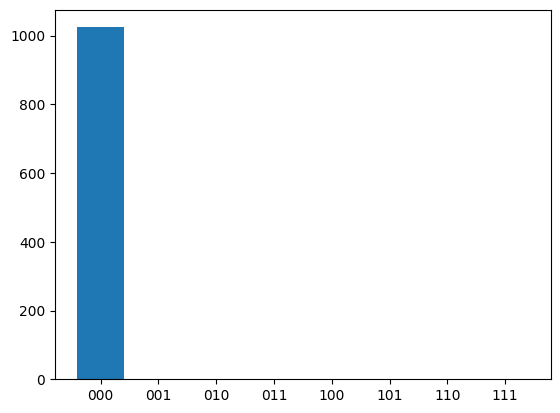

In [8]:
import matplotlib.pyplot as plt

keys = list(histogram.keys())
values = list(histogram.values())

plt.bar(keys, values)